<a href="https://colab.research.google.com/github/nvhien1961999/Covid19_auto_detecting_vision_transformer_model/blob/main/test_vgg16_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive._mount('/content/drive')

Mounted at /content/drive


In [ ]:
root_folder = "/content/drive/MyDrive/VGG16_3" + "/"

In [ ]:
from tensorflow import keras
import pickle
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix
import matplotlib.pyplot as plt
import json
import os
import numpy as np
from sklearn.metrics import classification_report
import torch
from os import listdir
import cv2

In [ ]:
model = keras.models.load_model(root_folder + "filepath.hdf5")

In [ ]:
def load_data(src):
    src = src + '/'
    #resize
    print("[INFO] loading images...")

    data = []
    labels = []
    num_img = 0

    # Lặp qua các folder con trong thư mục raw
    for folder in listdir(src):
        if folder!='.DS_Store':
            print("Folder: ",folder)
            # Lặp qua các file trong từng thư mục chứa các anh
            for file in listdir(src  + folder):
                if file!='.DS_Store':
                    # print("File: ", file + ", folder: ",folder)
                    data.append( cv2.resize(cv2.imread(src + folder + "/" + file),dsize=(224,224)))
                    labels.append( folder)
                    num_img += 1

    data = np.array(data)
    labels = np.array(labels)#.reshape(-1,1)

    from sklearn.preprocessing import LabelBinarizer
    encoder = LabelBinarizer()
    labels = encoder.fit_transform(labels)
    # print(labels)

    return data, labels

In [ ]:
testX, testY = load_data("/content/drive/MyDrive/dataset/splitted_dataset/test")

In [ ]:
h = json.load(open(root_folder + "vgghist.history", 'r'))

In [ ]:
plt.style.use("ggplot")

length = 50

fig, (ax1, ax2) = plt.subplots(figsize=(9, 8), nrows=2, ncols=1)
fig.suptitle("Training Result")
ax1.plot(range(1, length + 1), h["loss"], "o-", label="Training")
ax1.plot(range(1, length + 1), h["val_loss"], "o--", label="Validation")
ax1.set_xticks(torch.arange(1, length + 1, 1))
ax1.set_xlim(1, length)
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend()
ax2.plot(range(1, length + 1), h["accuracy"], "o-", label="Training")
ax2.plot(range(1, length + 1), h["val_accuracy"], "o--", label="Validation")
ax2.legend()
ax2.set_xticks(torch.arange(1, length + 1, 1))
ax2.set_xlim(1, length)
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Accuracy")
fig.tight_layout()
fig.show()

In [ ]:
print("[INFO] evaluating network...")
predIdxs = model.predict(testX)
predIdxs = np.argmax(predIdxs, axis=1)


In [ ]:
class_name = ['covid','normal','other']

In [ ]:
cm = confusion_matrix(testY.argmax(axis=1), predIdxs)
mcm = multilabel_confusion_matrix(testY.argmax(axis=1), predIdxs)
total = sum(sum(cm))
acc_covid = cm[0, 0] / (cm[0, 0] + cm[0, 1] + cm[0,2])
acc_normal = cm[1, 1] / (cm[1, 0] + cm[1, 1] + cm[1,2])
acc_other = cm[2,2] / (cm[2,0] + cm[2,1] + cm[2,2])
tp = cm[0,0]
tn= cm[1,1] + cm[1,2] + cm[2,2] + cm[2,2]
fp = cm[0,1] + cm[0,2]
fn = cm[1,0] + cm[2,0]
print(cm)
print(str(tp))
print(str(fp))
print(str(fn))
print(str(tn))

In [ ]:
acc = (cm[0,0]+cm[1,1]+cm[2,2])/total
print("accuracy = {:.4f}".format(acc))
print("acc_covid = {:.4f}".format(acc_covid))
print("acc_normal = {:.4f}".format(acc_normal))
print("acc_other = {:.4f}".format(acc_other))

In [ ]:
pr = tp/(tp+fp)
rc = tp/(tp+fn)
f1 = 2*pr*rc/(pr+rc)
print('precision = ' + str(pr))
print('recall = ' + str(rc))
print('f1_score = ' + str(f1))


In [ ]:
training_time = 0
with open(root_folder + "training_time.txt") as f:
    for line in f:
        arr = line.split(",")
        for e in arr:
          v = e.split("[")[-1]
          v = v.split("]")[0]
          training_time = float(v)/60
print("The model was trained within " + str(training_time) + " minute(s).")

In [ ]:
import cv2
import tensorflow as tf
from google.colab.patches import cv2_imshow
from keras.preprocessing import image
def predict_img(link):
  link = link
  img = image.load_img(link,target_size=(224,224))
  img = np.asarray(img)
  img = np.expand_dims(img, axis=0)
  res = model.predict(img).argmax(1).tolist()[0]
  classname_dictionary = {
        "0":"covid",
        "1":"normal",
        "2":"other"
    }
  res = classname_dictionary[str(res)]
  org = (75, 50)
  font = cv2.FONT_HERSHEY_SIMPLEX
  fontScale = 1.5
  color = (255, 255, 255)
  thickness = 2
  img_display = cv2.imread(link)
  cv2.putText(img_display, res, org, font, fontScale, color, thickness, cv2.LINE_AA)
  cv2_imshow(img_display)
  

File name: COVID-1.png


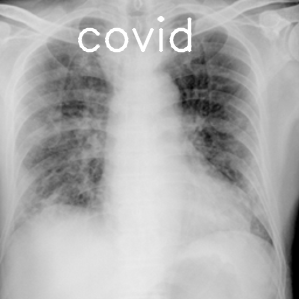

-------------------------------------





File name: COVID-2.png


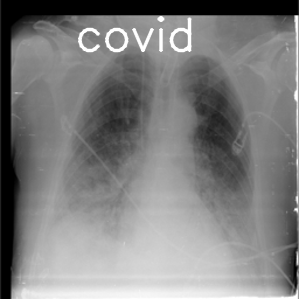

-------------------------------------





File name: COVID-3.png


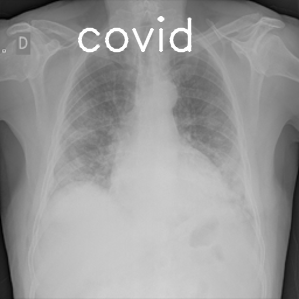

-------------------------------------





File name: COVID-4.png


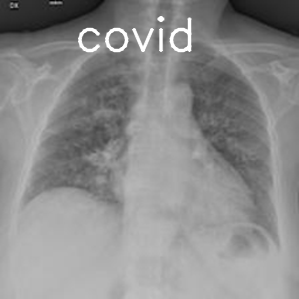

-------------------------------------





File name: COVID-5.png


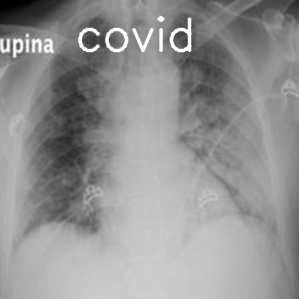

-------------------------------------





File name: NORMAL-1.png


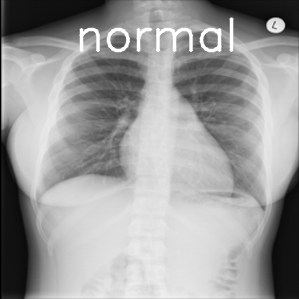

-------------------------------------





File name: NORMAL-2.png


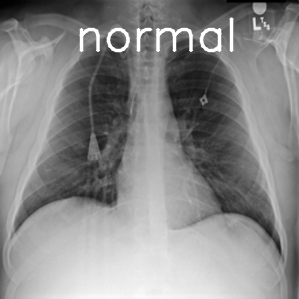

-------------------------------------





File name: NORMAL-3.png


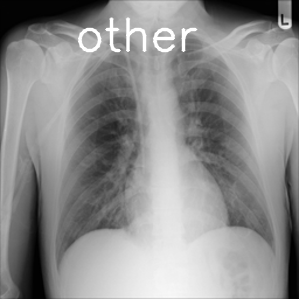

-------------------------------------





File name: NORMAL-4.png


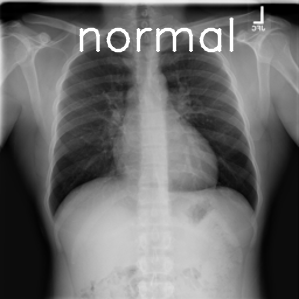

-------------------------------------





File name: NORMAL-5.png


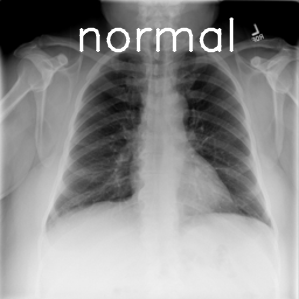

-------------------------------------





File name: OTHER-1.png


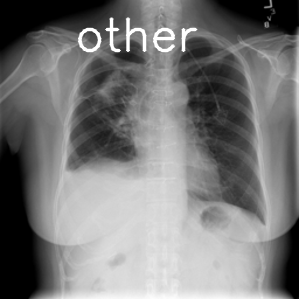

-------------------------------------





File name: OTHER-2.png


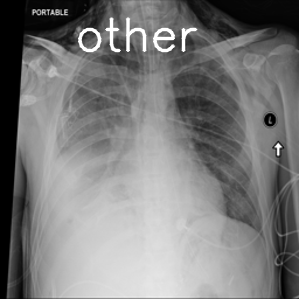

-------------------------------------





File name: OTHER-3.png


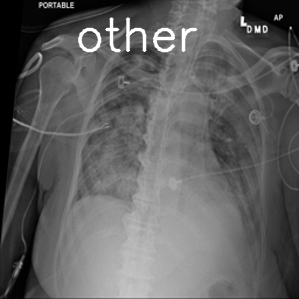

-------------------------------------





File name: OTHER-4.png


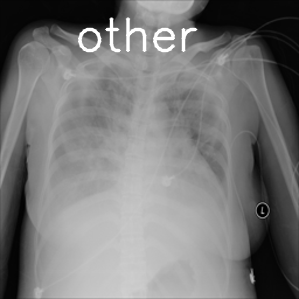

-------------------------------------





File name: OTHER-5.png


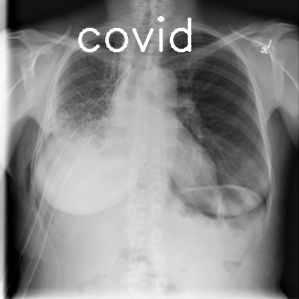

-------------------------------------







In [ ]:
sorted_dir = sorted(os.listdir('/content/drive/MyDrive/dataset/temp'))
src = '/content/drive/MyDrive/dataset/temp' + '/'
for file in sorted_dir:
  print('File name: ' + str(file))
  predict_img(src + file)
  print('-------------------------------------')
  print('\n\n\n\n')